# ETL 

In [1]:
# Import dependencies
import pandas as pd
import pymongo

In [2]:
# Read CSV file - World Happiness Report for 2019
df_2019=pd.read_csv('2019.csv',index_col=None)

In [3]:
# Print Happiness report
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
# Read CSV file - Income Group
df_inc = pd.read_csv(r'WB_Income_Group.csv', encoding='cp1252',index_col=None)
df_inc = df_inc.drop(columns='X')
df_inc = df_inc.dropna()
df_inc = df_inc.iloc[1:,:]

In [6]:
#Print income group table
df_inc.head()

,Country,Code,Region,Income group
1,Afghanistan,AFG,South Asia,Low income
2,Albania,ALB,Europe & Central Asia,Upper middle income
3,Algeria,DZA,Middle East & North Africa,Lower middle income
4,American Samoa,ASM,East Asia & Pacific,Upper middle income
5,Andorra,AND,Europe & Central Asia,High income


In [7]:
#Establish connection to mongo db
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [8]:
#Create the database happy_db
db = client.happy_db

In [9]:
#Setup collections income_group and happy_ranking, if collections exist drop them start anew, 
db.income_group.drop()
db.happy_ranking.drop()

In [11]:
#Convert pandas dataframe  to dictionary, orient as a record, keeps a copy
df_dict = df_inc.to_dict(orient='records').copy()

In [12]:
#Inserted the dictionary into collection
db.income_group.insert_many(df_dict)

In [21]:
#print income group documents
cursor = db.income_group.find({},limit=2)
for document in cursor:
    print(document)

{'_id': ObjectId('5fd51748804da7e295c2f8f0'), 'Country': 'Afghanistan', 'Code': 'AFG', 'Region': 'South Asia', 'Income group': 'Low income'}
{'_id': ObjectId('5fd51748804da7e295c2f8f1'), 'Country': 'Albania', 'Code': 'ALB', 'Region': 'Europe & Central Asia', 'Income group': 'Upper middle income'}


In [14]:
#Convert pandas happy ranking for 2019 dataframe  to dictionary, orient as a record, keeps a copy
df_happy_dict = df_2019.to_dict(orient='records').copy()

In [15]:
db.happy_ranking.insert_many(df_happy_dict)

In [20]:
cursor = db.happy_ranking.find({},limit=2)
for document in cursor:
    print(document)

{'_id': ObjectId('5fd517d3804da7e295c2f9ca'), 'Overall rank': 1, 'Country or region': 'Finland', 'Score': 7.769, 'GDP per capita': 1.34, 'Social support': 1.587, 'Healthy life expectancy': 0.986, 'Freedom to make life choices': 0.596, 'Generosity': 0.153, 'Perceptions of corruption': 0.39299999999999996}
{'_id': ObjectId('5fd517d3804da7e295c2f9cb'), 'Overall rank': 2, 'Country or region': 'Denmark', 'Score': 7.6, 'GDP per capita': 1.383, 'Social support': 1.5730000000000002, 'Healthy life expectancy': 0.996, 'Freedom to make life choices': 0.5920000000000001, 'Generosity': 0.252, 'Perceptions of corruption': 0.41}


In [17]:
#Read happy ranking collection from mongodb into a dataframe df_ranking
df_ranking = pd.DataFrame(list(db.happy_ranking.find({})))
df_ranking.head()

,_id,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,5fd517d3804da7e295c2f9ca,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,5fd517d3804da7e295c2f9cb,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,5fd517d3804da7e295c2f9cc,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,5fd517d3804da7e295c2f9cd,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5fd517d3804da7e295c2f9ce,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
#Read income group collection from mongodb into a dataframe df_income
df_income = pd.DataFrame(list(db.income_group.find({})))
df_income.head()

,_id,Country,Code,Region,Income group
0,5fd51748804da7e295c2f8f0,Afghanistan,AFG,South Asia,Low income
1,5fd51748804da7e295c2f8f1,Albania,ALB,Europe & Central Asia,Upper middle income
2,5fd51748804da7e295c2f8f2,Algeria,DZA,Middle East & North Africa,Lower middle income
3,5fd51748804da7e295c2f8f3,American Samoa,ASM,East Asia & Pacific,Upper middle income
4,5fd51748804da7e295c2f8f4,Andorra,AND,Europe & Central Asia,High income


In [23]:
#Merge the 2 dataframes on Country
combined = pd.merge(df_ranking, df_income, left_on='Country or region', right_on='Country')
combined.head()

,_id_x,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,_id_y,Country,Code,Region,Income group
0,5fd517d3804da7e295c2f9ca,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,5fd51748804da7e295c2f933,Finland,FIN,Europe & Central Asia,High income
1,5fd517d3804da7e295c2f9cb,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,5fd51748804da7e295c2f925,Denmark,DNK,Europe & Central Asia,High income
2,5fd517d3804da7e295c2f9cc,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,5fd51748804da7e295c2f983,Norway,NOR,Europe & Central Asia,High income
3,5fd517d3804da7e295c2f9cd,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,5fd51748804da7e295c2f948,Iceland,ISL,Europe & Central Asia,High income
4,5fd517d3804da7e295c2f9ce,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,5fd51748804da7e295c2f97b,Netherlands,NLD,Europe & Central Asia,High income


In [24]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 0 to 135
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   _id_x                         136 non-null    object 
 1   Overall rank                  136 non-null    int64  
 2   Country or region             136 non-null    object 
 3   Score                         136 non-null    float64
 4   GDP per capita                136 non-null    float64
 5   Social support                136 non-null    float64
 6   Healthy life expectancy       136 non-null    float64
 7   Freedom to make life choices  136 non-null    float64
 8   Generosity                    136 non-null    float64
 9   Perceptions of corruption     136 non-null    float64
 10  _id_y                         136 non-null    object 
 11  Country                       136 non-null    object 
 12  Code                          136 non-null    object 
 13  Regio

In [33]:
#Print 10 countries that were least happy and their income level and corruption
combined_asc = combined.sort_values(by='Score')
combined_asc = combined_asc[['Country','Income group','Score','Generosity','Perceptions of corruption']]
combined_asc.head(10).style.hide_index()

Country,Income group,Score,Generosity,Perceptions of corruption
South Sudan,Low income,2.853000,0.202000,0.091000
Central African Republic,Low income,3.083000,0.235000,0.035000
Afghanistan,Low income,3.203000,0.158000,0.025000
Tanzania,Lower middle income,3.231000,0.276000,0.147000
Rwanda,Low income,3.334000,0.217000,0.411000
Malawi,Low income,3.410000,0.218000,0.089000
Botswana,Upper middle income,3.488000,0.025000,0.100000
Haiti,Low income,3.597000,0.419000,0.110000
Zimbabwe,Lower middle income,3.663000,0.151000,0.089000
Burundi,Low income,3.775000,0.176000,0.180000


In [35]:
#Print 10 countries that were happy and their income level and corruption
combined_desc = combined.sort_values(by='Score',ascending=False)
combined_desc = combined_desc[['Country','Income group','Score','Generosity','Perceptions of corruption']]
combined_desc.head(10).style.hide_index()

Country,Income group,Score,Generosity,Perceptions of corruption
Finland,High income,7.769000,0.153000,0.393000
Denmark,High income,7.600000,0.252000,0.410000
Norway,High income,7.554000,0.271000,0.341000
Iceland,High income,7.494000,0.354000,0.118000
Netherlands,High income,7.488000,0.322000,0.298000
Switzerland,High income,7.480000,0.263000,0.343000
Sweden,High income,7.343000,0.267000,0.373000
New Zealand,High income,7.307000,0.330000,0.380000
Canada,High income,7.278000,0.285000,0.308000
Austria,High income,7.246000,0.244000,0.226000


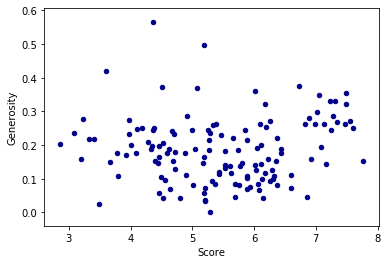

In [42]:
combined_desc.plot.scatter(x='Score',y='Generosity',c='DarkBlue')

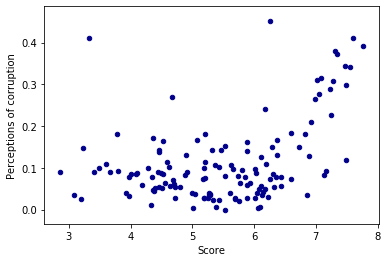

In [43]:
combined_desc.plot.scatter(x='Score',y='Perceptions of corruption',c='DarkBlue')